# **APPENDIX**

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

import tensorflow as tf
from sklearn.decomposition import PCA

import cv2
import os

import numpy as np

from sklearn.model_selection import train_test_split

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import models, layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dropout, Flatten, Input, Dense

In [2]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


/content/drive/MyDrive/COVID/train/Covid Positive/00870a9c.jpg
/content/drive/MyDrive/COVID/train/Covid Positive/000025-1.jpg
/content/drive/MyDrive/COVID/train/Covid Positive/11547_2020_1200_Fig2_HTML-a.png
/content/drive/MyDrive/COVID/train/Covid Positive/000024-1.jpg
/content/drive/MyDrive/COVID/train/Covid Positive/1052b0fe.jpg
/content/drive/MyDrive/COVID/train/Covid Negative/person108_virus_199.jpeg
/content/drive/MyDrive/COVID/train/Covid Negative/person120_virus_226.jpeg
/content/drive/MyDrive/COVID/train/Covid Negative/person124_virus_238.jpeg
/content/drive/MyDrive/COVID/train/Covid Negative/person130_virus_263.jpeg
/content/drive/MyDrive/COVID/train/Covid Negative/person124_virus_236.jpeg


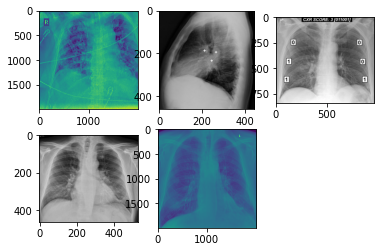

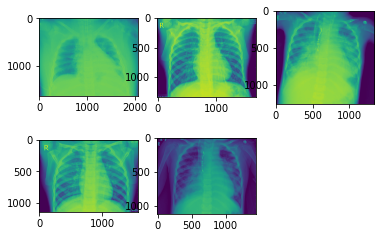

In [3]:
import matplotlib.image as mpimg
directory=os.listdir('/content/drive/MyDrive/COVID/train/')
for each in directory:
    plt.figure()
    currentFolder = '/content/drive/MyDrive/COVID/train/' + each
    for i, file in enumerate(os.listdir(currentFolder)[0:5]):
        fullpath = currentFolder  + "/" + file
        print(fullpath)
        img=mpimg.imread(fullpath)
        plt.subplot(2, 3, i+1)
        plt.imshow(img)

/content/drive/MyDrive/COVID/train/Covid Positive/00870a9c.jpg
/content/drive/MyDrive/COVID/train/Covid Positive/000025-1.jpg
/content/drive/MyDrive/COVID/train/Covid Positive/11547_2020_1200_Fig2_HTML-a.png
/content/drive/MyDrive/COVID/train/Covid Positive/000024-1.jpg
/content/drive/MyDrive/COVID/train/Covid Positive/1052b0fe.jpg
/content/drive/MyDrive/COVID/train/Covid Negative/person108_virus_199.jpeg
/content/drive/MyDrive/COVID/train/Covid Negative/person120_virus_226.jpeg
/content/drive/MyDrive/COVID/train/Covid Negative/person124_virus_238.jpeg
/content/drive/MyDrive/COVID/train/Covid Negative/person130_virus_263.jpeg
/content/drive/MyDrive/COVID/train/Covid Negative/person124_virus_236.jpeg


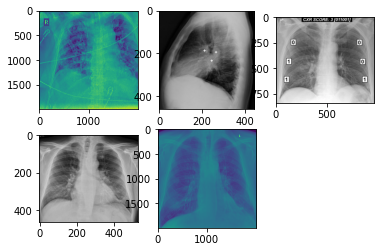

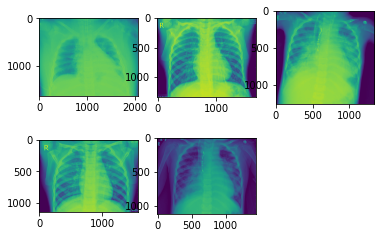

In [4]:
import matplotlib.image as mpimg
directory=os.listdir('/content/drive/MyDrive/COVID/train/')
for each in directory:
    plt.figure()
    currentFolder = '/content/drive/MyDrive/COVID/train/' + each
    for i, file in enumerate(os.listdir(currentFolder)[0:5]):
        fullpath = currentFolder  + "/" + file
        print(fullpath)
        img=mpimg.imread(fullpath)
        plt.subplot(2, 3, i+1)
        plt.imshow(img)

In [38]:
labels = ['Covid Negative', 'Covid Positive']
img_size = 64
def get_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [39]:
train = get_data('/content/drive/MyDrive/COVID/train/')
test = get_data('/content/drive/MyDrive/COVID/test/')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  from ipykernel import kernelapp as app


In [49]:

path = '/content/drive/MyDrive/COVID/train/Covid Positive'
path1 = '/content/drive/MyDrive/COVID/test/Covid Positive'
path2 = '/content/drive/MyDrive/COVID/train/Covid Negative'
path3 = '/content/drive/MyDrive/COVID/test/Covid Negative'
covidpositives = len([f for f in os.listdir(path)if os.path.isfile(os.path.join(path, f))]) + len([f for f in os.listdir(path1)if os.path.isfile(os.path.join(path1, f))])
covidnegatives = len([f for f in os.listdir(path2)if os.path.isfile(os.path.join(path2, f))]) + len([f for f in os.listdir(path3)if os.path.isfile(os.path.join(path3, f))])



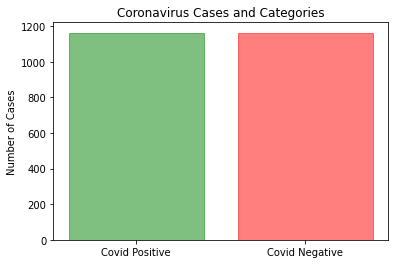

In [50]:
Cats = ['Covid Positive', 'Covid Negative']
y_pos = np.arange(len(Cats))
barlist = plt.bar(y_pos,[covidpositives, covidnegatives], align='center', alpha=0.5)
barlist[0].set_color('g')
barlist[1].set_color('r')
plt.xticks(y_pos,['Covid Positive', 'Covid Negative'])
plt.ylabel('Number of Cases')
plt.title('Coronavirus Cases and Categories')

plt.show()

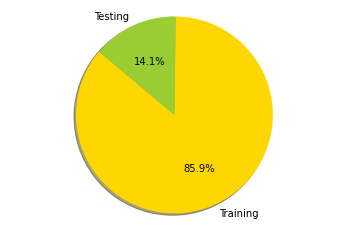

In [42]:
path = '/content/drive/MyDrive/COVID/test/Covid Negative'
path1 = '/content/drive/MyDrive/COVID/test/Covid Positive'
path2 = '/content/drive/MyDrive/COVID/train/Covid Negative'
path3 = '/content/drive/MyDrive/COVID/train/Covid Positive'
Test = len([f for f in os.listdir(path)if os.path.isfile(os.path.join(path, f))]) + len([f for f in os.listdir(path1)if os.path.isfile(os.path.join(path1, f))])
Train = len([f for f in os.listdir(path2)if os.path.isfile(os.path.join(path2, f))]) + len([f for f in os.listdir(path3)if os.path.isfile(os.path.join(path3, f))])
# Data to plot
labels = 'Training', 'Testing'
sizes = [Train, Test]
colors = ['gold', 'yellowgreen']
explode = (0, 0)  # explode 1st slice

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

Text(0.5, 1.0, 'Training Set: Covid Negative')

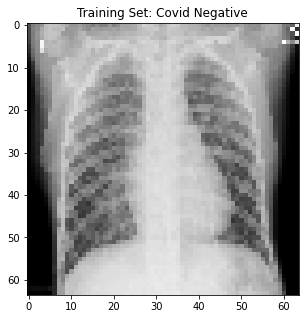

In [77]:
plt.figure(figsize = (5,5))
plt.imshow(train[1][0])
plt.title('Training Set: Covid Negative')


Text(0.5, 1.0, 'Training Set: Covid Positive')

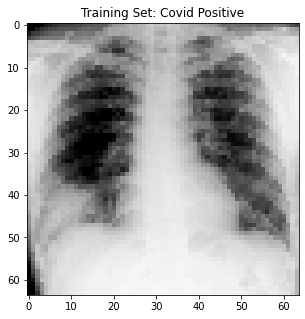

In [44]:
plt.figure(figsize = (5,5))
plt.imshow(train[-1][0])
plt.title('Training Set: Covid Positive')



In [51]:
x_train = []
y_train = []
x_test = []
y_test = []

for feature, label in train:
  x_train.append(feature)
  y_train.append(label)

for feature, label in test:
  x_test.append(feature)
  y_test.append(label)

# Normalize the data
x_train = np.array(x_train) / 255
x_test = np.array(x_test) / 255

x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_test.reshape(-1, img_size, img_size, 1)
y_test = np.array(y_test)

In [52]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=True)  # randomly flip images


datagen.fit(x_train)

In [53]:
X_train, X_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Experiment 1

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu, input_shape=(64, 64, 3)))
model.add(layers.MaxPooling2D((2, 2),strides=2))
model.add(layers.Flatten())
model.add(layers.Dense(units=32, activation=tf.nn.relu))
model.add(layers.Dense(units=1, activation=tf.nn.sigmoid))

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [ ]:
%%time
history = model.fit(X_train,
                    y_train,
                    validation_data = (X_val, y_val),
                    epochs=20,
                    batch_size=512                                                                                                         
                   )

In [ ]:
import numpy as np


loss, accuracy = model.evaluate(x_test, y_test)
print('test set accuracy: ', accuracy * 100)



# Experiment 2

In [ ]:
model2 = models.Sequential()
model2.add(layers.Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu, input_shape=(64, 64, 3)))
model2.add(layers.MaxPooling2D((2, 2),strides=2))
model2.add(layers.Flatten())
model2.add(layers.Dense(units=64, activation=tf.nn.relu))
model2.add(layers.Dense(units=1, activation=tf.nn.sigmoid))

In [ ]:
model2.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [ ]:
%%time
history2 = model2.fit(X_train,
                    y_train,
                    validation_data = (X_val, y_val),
                    epochs=20,
                    batch_size=512                                                                                                         
                   )

In [ ]:
loss, accuracy = model2.evaluate(x_test, y_test)
print('test set accuracy: ', accuracy * 100)


# Experiment 3

In [ ]:
model3 = models.Sequential()
model3.add(layers.Conv2D(filters=128, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu, input_shape=(64, 64, 3)))
model3.add(layers.MaxPooling2D((2, 2),strides=2))
model3.add(layers.Flatten())
model3.add(layers.Dense(units=128, activation=tf.nn.relu))
model3.add(layers.Dense(units=1, activation=tf.nn.sigmoid))

In [ ]:
model3.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [ ]:
%%time
history3 = model3.fit(X_train,
                    y_train,
                    validation_data = (X_val, y_val),
                    epochs=20,
                    batch_size=512                                                                                                         
                   )

In [ ]:
loss, accuracy = model3.evaluate(x_test, y_test)
print('test set accuracy: ', accuracy * 100)

# Experiment 4

In [ ]:
model4 = models.Sequential()
model4.add(layers.Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu, input_shape=(64, 64, 3)))
model4.add(layers.MaxPooling2D((2, 2),strides=2))
model4.add(layers.Conv2D(filters=32, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu))
model4.add(layers.MaxPooling2D((2, 2),strides=2))
model4.add(layers.Flatten())4
model4.add(layers.Dense(units=256, activation=tf.nn.relu))
model4.add(layers.Dense(units=1, activation=tf.nn.sigmoid))

In [ ]:
model4.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [ ]:
%%time
history4 = model4.fit(X_train,
                    y_train,
                    validation_data = (X_val, y_val),
                    epochs=20,
                    batch_size=512                                                                                                         
                   )

In [ ]:
loss, accuracy = model4.evaluate(x_test, y_test)
print('test set accuracy: ', accuracy * 100)

# Experiment 5

In [ ]:
model5 = models.Sequential()
model5.add(layers.Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu, input_shape=(64, 64, 3)))
model5.add(layers.MaxPooling2D((2, 2),strides=2))
model5.add(layers.Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu))
model5.add(layers.MaxPooling2D((2, 2),strides=2))
model5.add(layers.Flatten())
model5.add(layers.Dense(units=256, activation=tf.nn.relu))
model5.add(layers.Dense(units=1, activation=tf.nn.sigmoid))

In [ ]:
model5.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [ ]:
%%time
history5 = model5.fit(X_train,
                    y_train,
                    validation_data = (X_val, y_val),
                    epochs=20,
                    batch_size=512                                                                                                         
                   )

In [ ]:
loss, accuracy = model5.evaluate(x_test, y_test)
print('test set accuracy: ', accuracy * 100)

# Experiment 6

In [ ]:
model6 = models.Sequential()
model6.add(layers.Conv2D(filters=128, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu, input_shape=(64, 64, 3)))
model6.add(layers.MaxPooling2D((2, 2),strides=2))
model6.add(layers.Conv2D(filters=128, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu))
model6.add(layers.MaxPooling2D((2, 2),strides=2))
model6.add(layers.Flatten())
model6.add(layers.Dense(units=256, activation=tf.nn.relu))
model6.add(layers.Dense(units=1, activation=tf.nn.sigmoid))

In [ ]:
model6.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [ ]:
%%time
history6 = model6.fit(X_train,
                    y_train,
                    validation_data = (X_val, y_val),
                    epochs=20,
                    batch_size=512                                                                                                         
                   )

In [ ]:
loss, accuracy = model6.evaluate(x_test, y_test)
print('test set accuracy: ', accuracy * 100)

# Experiment 7

In [ ]:
model7 = models.Sequential()
model7.add(layers.Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu, input_shape=(64, 64, 3)))
model7.add(layers.MaxPooling2D((2, 2),strides=2))
model7.add(layers.Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu))
model7.add(layers.MaxPooling2D((2, 2),strides=2))
model7.add(layers.Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu))
model7.add(layers.MaxPooling2D((2, 2),strides=2))
model7.add(layers.Flatten())
model7.add(layers.Dense(units=256, activation=tf.nn.relu))
model7.add(layers.Dense(units=1, activation=tf.nn.sigmoid))

In [ ]:
model7.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [ ]:
%%time
history7 = model7.fit(X_train,
                    y_train,
                    validation_data = (X_val, y_val),
                    epochs=20,
                    batch_size=512                                                                                                         
                   )

In [ ]:
loss, accuracy = model7.evaluate(x_test, y_test)
print('test set accuracy: ', accuracy * 100)

# Experiment 8

In [ ]:
from keras.layers import AveragePooling2D
model8 = models.Sequential()
model8.add(layers.Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu, input_shape=(64, 64, 3)))
model8.add(layers.AveragePooling2D((2, 2),strides=2))
model8.add(layers.Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu))
model8.add(layers.AveragePooling2D((2, 2),strides=2))
model8.add(layers.Conv2D(filters=64, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu))
model8.add(layers.AveragePooling2D((2, 2),strides=2))
model8.add(layers.Flatten())
model8.add(layers.Dense(units=256, activation=tf.nn.relu))
model8.add(layers.Dense(units=1, activation=tf.nn.sigmoid))

In [ ]:
model8.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [ ]:
 %%time
history8 = model8.fit(X_train,
                    y_train,
                    validation_data = (X_val, y_val),
                    epochs=20,
                    batch_size=512                                                                                                         
                   )

In [ ]:
loss, accuracy = model8.evaluate(x_test, y_test)
print('test set accuracy: ', accuracy * 100)

# Experiment 9

In [54]:
model9 = models.Sequential()
model9.add(layers.Conv2D(filters=128, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu, input_shape=(64, 64, 3)))
model9.add(layers.MaxPooling2D((2, 2),strides=2))
model9.add(layers.Conv2D(filters=128, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu))
model9.add(layers.MaxPooling2D((2, 2),strides=2))
model9.add(layers.Conv2D(filters=128, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu))
model9.add(layers.MaxPooling2D((2, 2),strides=2))
model9.add(layers.Flatten())
model9.add(layers.Dense(units=256, activation=tf.nn.relu))
model9.add(layers.Dense(units=1, activation=tf.nn.sigmoid))

In [55]:
model9.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [56]:
 %%time
history9 = model9.fit(X_train,
                    y_train,
                    validation_data = (X_val, y_val),
                    epochs=20,
                    batch_size=512                                                                                                         
                   )

Epoch 1/20
4/4 [==============================] - 1s 191ms/step - loss: 0.7121 - accuracy: 0.5463 - val_loss: 0.6662 - val_accuracy: 0.8450
Epoch 2/20
4/4 [==============================] - 1s 146ms/step - loss: 0.6498 - accuracy: 0.7436 - val_loss: 0.5922 - val_accuracy: 0.6725
Epoch 3/20
4/4 [==============================] - 1s 144ms/step - loss: 0.5600 - accuracy: 0.6937 - val_loss: 0.4334 - val_accuracy: 0.8100
Epoch 4/20
4/4 [==============================] - 1s 148ms/step - loss: 0.3948 - accuracy: 0.8584 - val_loss: 0.2476 - val_accuracy: 0.9100
Epoch 5/20
4/4 [==============================] - 1s 143ms/step - loss: 0.2281 - accuracy: 0.9257 - val_loss: 0.1542 - val_accuracy: 0.9525
Epoch 6/20
4/4 [==============================] - 1s 146ms/step - loss: 0.1593 - accuracy: 0.9396 - val_loss: 0.1178 - val_accuracy: 0.9600
Epoch 7/20
4/4 [==============================] - 1s 148ms/step - loss: 0.1313 - accuracy: 0.9500 - val_loss: 0.1338 - val_accuracy: 0.9525
Epoch 8/20
4/4 [====

In [57]:
loss, accuracy = model9.evaluate(x_test, y_test)
print('test set accuracy: ', accuracy * 100)

11/11 [==============================] - 0s 5ms/step - loss: 0.0435 - accuracy: 0.9848
test set accuracy:  98.47561120986938


In [58]:
y_pred = (model9.predict(X_train) > 0.5).astype("int32")
confusion_matrix(y_train, y_pred)

array([[787,  14],
       [  5, 794]])

In [59]:
f1_score(y_train, y_pred, average='macro')

0.9881247727007274

In [60]:
recall_score(y_train, y_pred, average='macro')

0.9881320127062698

In [61]:
precision_score(y_train, y_pred, average='macro')

0.9881800680068007

In [62]:
y_pred = (model9.predict(x_test) > 0.5).astype("int32")
confusion_matrix(y_test, y_pred)

array([[162,   2],
       [  3, 161]])

In [63]:
f1_score(y_test, y_pred, average='macro')

0.9847559558666332

In [64]:
recall_score(y_test, y_pred, average='macro')

0.9847560975609756

In [65]:
precision_score(y_test, y_pred, average='macro')

0.9847741215839375

(1, 31, 31, 128)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: RuntimeWarning: invalid value encountered in true_divide


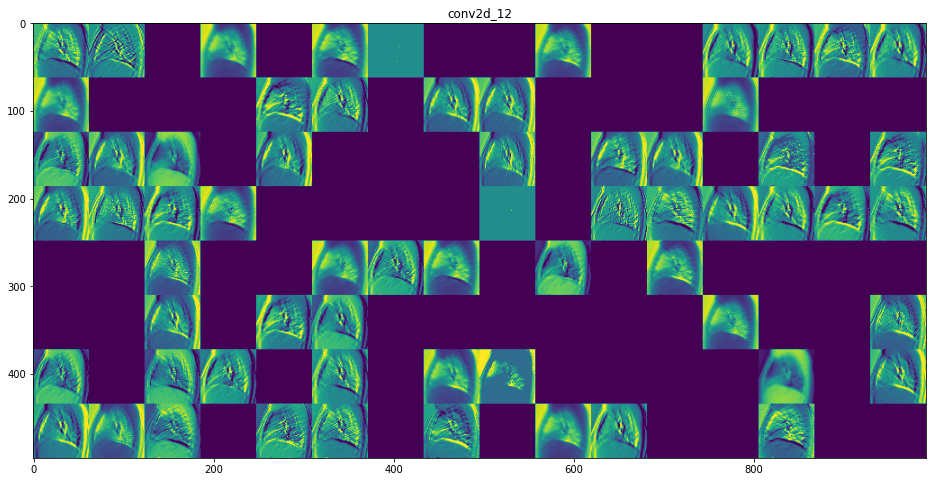

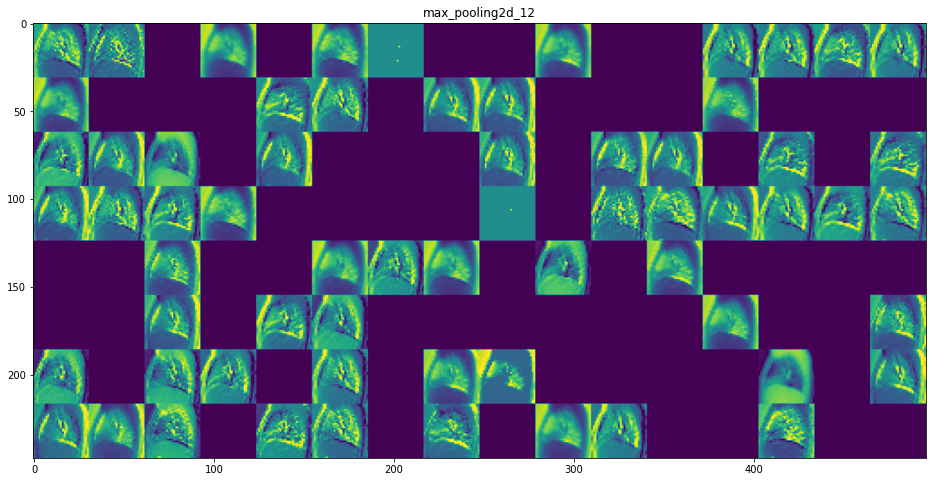

In [209]:
from keras.preprocessing import image
import numpy as np



img_tensor = image.img_to_array(x_test[2])
img_tensor = np.expand_dims(img_tensor, axis=0)
# Remember that the model was trained on inputs
# that were preprocessed in the following way:
img_tensor /= 255.


from keras import models

# Extracts the outputs of the top 8 layers:
layer_outputs = [layer.output for layer in model9.layers[:2]]
# Creates a model that will return these outputs, given the model input:
activation_model = models.Model(inputs=model9.input, outputs=layer_outputs)

# This will return a list of 5 Numpy arrays:
# one array per layer activation
activations = activation_model.predict(img_tensor)

first_layer_activation = activations[-1]
print(first_layer_activation.shape)


import keras

# These are the names of the layers, so can have them as part of our plot
layer_names = []
for layer in model9.layers[:8]:
    layer_names.append(layer.name)

images_per_row = 16

# Now let's display our feature maps
for layer_name, layer_activation in zip(layer_names, activations):
    # This is the number of features in the feature map
    n_features = layer_activation.shape[-1]

    # The feature map has shape (1, size, size, n_features)
    size = layer_activation.shape[1]

    # We will tile the activation channels in this matrix
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    # We'll tile each filter into this big horizontal grid
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            # Post-process the feature to make it visually palatable
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image

    # Display the grid
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
    
plt.show()


In [66]:

pred_classes = (model9.predict(x_test) > 0.5).astype("int32").ravel()

pred_classes

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [67]:
layer_outputs = [layer.output for layer in model9.layers]
activation_model = models.Model(inputs=model9.input, outputs=layer_outputs)
layer_outputs

[<KerasTensor: shape=(None, 62, 62, 128) dtype=float32 (created by layer 'conv2d_3')>,
 <KerasTensor: shape=(None, 31, 31, 128) dtype=float32 (created by layer 'max_pooling2d_3')>,
 <KerasTensor: shape=(None, 29, 29, 128) dtype=float32 (created by layer 'conv2d_4')>,
 <KerasTensor: shape=(None, 14, 14, 128) dtype=float32 (created by layer 'max_pooling2d_4')>,
 <KerasTensor: shape=(None, 12, 12, 128) dtype=float32 (created by layer 'conv2d_5')>,
 <KerasTensor: shape=(None, 6, 6, 128) dtype=float32 (created by layer 'max_pooling2d_5')>,
 <KerasTensor: shape=(None, 4608) dtype=float32 (created by layer 'flatten_1')>,
 <KerasTensor: shape=(None, 256) dtype=float32 (created by layer 'dense_2')>,
 <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'dense_3')>]

In [68]:
# Get the outputs of all the hidden nodes for each of the 60000 training images
activations = activation_model.predict(x_test) 
hidden_layer_activation = activations[7]
output_layer_activations = activations[8]
hidden_layer_activation.shape   #  each of the 128 hidden nodes has one activation value per training image

(328, 256)

In [69]:
#Get the dataframe of all the node values
activation_data = {'pred_class':pred_classes[0:328]}
for k in range(0,256): 
    activation_data[f"act_val_{k}"] = hidden_layer_activation[:,k]


activation_df = pd.DataFrame(activation_data)
activation_df.head()

,pred_class,act_val_0,act_val_1,act_val_2,act_val_3,act_val_4,act_val_5,act_val_6,act_val_7,act_val_8,act_val_9,act_val_10,act_val_11,act_val_12,act_val_13,act_val_14,act_val_15,act_val_16,act_val_17,act_val_18,act_val_19,act_val_20,act_val_21,act_val_22,act_val_23,act_val_24,act_val_25,act_val_26,act_val_27,act_val_28,act_val_29,act_val_30,act_val_31,act_val_32,act_val_33,act_val_34,act_val_35,act_val_36,act_val_37,act_val_38,...,act_val_216,act_val_217,act_val_218,act_val_219,act_val_220,act_val_221,act_val_222,act_val_223,act_val_224,act_val_225,act_val_226,act_val_227,act_val_228,act_val_229,act_val_230,act_val_231,act_val_232,act_val_233,act_val_234,act_val_235,act_val_236,act_val_237,act_val_238,act_val_239,act_val_240,act_val_241,act_val_242,act_val_243,act_val_244,act_val_245,act_val_246,act_val_247,act_val_248,act_val_249,act_val_250,act_val_251,act_val_252,act_val_253,act_val_254,act_val_255
0,0,0.0,0.261437,0.0,0.0,2.302884,0.0,0.0,0.0,0.0,0.341913,0.0,0.0,3.548921,3.409169,1.570608,0.211239,2.677454,0.0,0.0,0.997025,0.0,0.0,0.0,0.0,0.0,0.009,0.307440,0.0,0.154278,0.0,0.0,0.0,0.0,0.0,0.481823,0.763086,1.499951,0.0,0.380286,...,0.0,0.0,0.828,0.0,0.691979,0.288572,0.194117,0.0,2.671017,0.0,0.401373,0.0,0.350708,0.0,0.064368,0.0,0.711159,0.647023,0.0,0.0,0.0,0.253932,0.795163,0.0,0.0,0.0,0.268194,0.903825,0.0,0.640508,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.523525,0.0,0.077618
1,0,0.0,0.000000,0.0,0.0,2.508843,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,3.892577,3.268172,0.642813,0.000000,3.170979,0.0,0.0,0.258786,0.0,0.0,0.0,0.0,0.0,0.000,0.130123,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.083253,0.027136,2.251592,0.0,0.095135,...,0.0,0.0,0.000,0.0,0.000000,0.000000,0.000000,0.0,2.458078,0.0,0.112028,0.0,0.276074,0.0,0.000000,0.0,0.146139,0.105828,0.0,0.0,0.0,0.000000,0.209110,0.0,0.0,0.0,0.000000,0.042054,0.0,0.133889,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
2,0,0.0,0.000000,0.0,0.0,2.587324,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,4.149415,3.621485,0.578996,0.000000,3.411779,0.0,0.0,0.195834,0.0,0.0,0.0,0.0,0.0,0.000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,2.400424,0.0,0.000000,...,0.0,0.0,0.000,0.0,0.000000,0.000000,0.000000,0.0,2.868928,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.262430,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000
3,0,0.0,0.000000,0.0,0.0,2.679549,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,3.664320,3.327153,1.084718,0.000000,3.039754,0.0,0.0,0.803480,0.0,0.0,0.0,0.0,0.0,0.000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,2.100616,0.0,0.040609,...,0.0,0.0,0.000,0.0,0.196498,0.083333,0.000000,0.0,2.648435,0.0,0.098207,0.0,0.000000,0.0,0.000000,0.0,0.063283,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.252829,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.041615,0.0,0.000000
4,0,0.0,0.000000,0.0,0.0,3.288160,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,4.928174,4.347525,0.718204,0.000000,4.221095,0.0,0.0,0.287112,0.0,0.0,0.0,0.0,0.0,0.000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.083927,2.940155,0.0,0.000000,...,0.0,0.0,0.000,0.0,0.000000,0.000000,0.000000,0.0,3.475505,0.0,0.000000,0.0,0.010171,0.0,0.000000,0.0,0.146533,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000


In [70]:
# Separating out the features
features = [*activation_data][1:] # ['act_val_0', 'act_val_1',...]
x = activation_df.loc[:, features].values 

pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['pca-one', 'pca-two', 'pca-three'])
principalDf.head()

,pca-one,pca-two,pca-three
0,-5.853893,2.599480,1.266800
1,-9.155988,1.404219,-0.198507
2,-10.286340,2.204174,-0.435203
3,-8.915661,1.304460,0.064735
4,-12.442112,5.414866,-0.132032


In [71]:
activation_pca_df = pd.concat([principalDf, activation_df[['pred_class']]], axis = 1)
activation_pca_df.head()

,pca-one,pca-two,pca-three,pred_class
0,-5.853893,2.599480,1.266800,0
1,-9.155988,1.404219,-0.198507,0
2,-10.286340,2.204174,-0.435203,0
3,-8.915661,1.304460,0.064735,0
4,-12.442112,5.414866,-0.132032,0


In [72]:
N=10000
activation_df_subset = activation_df.iloc[:N].copy()
activation_df_subset.shape

(328, 257)

In [73]:
data_subset = activation_df_subset[features].values
data_subset.shape

(328, 256)

In [74]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(data_subset)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 328 samples in 0.004s...
[t-SNE] Computed neighbors for 328 samples in 0.040s...
[t-SNE] Computed conditional probabilities for sample 328 / 328
[t-SNE] Mean sigma: 1.609862
[t-SNE] KL divergence after 250 iterations with early exaggeration: 52.930374
[t-SNE] KL divergence after 300 iterations: 0.244041


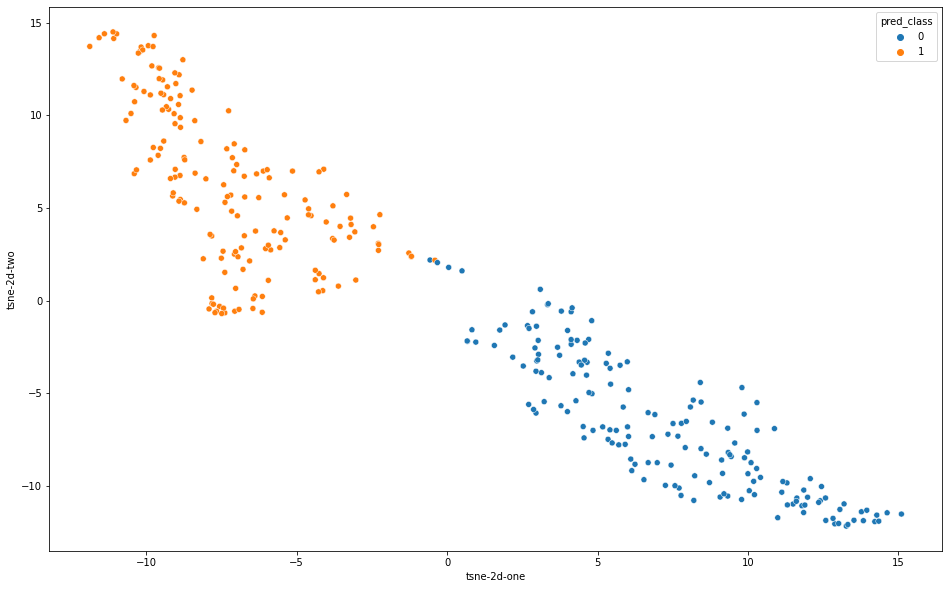

In [75]:
activation_df_subset['tsne-2d-one'] = tsne_results[:,0]
activation_df_subset['tsne-2d-two'] = tsne_results[:,1]

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="pred_class",
    palette=sns.color_palette(n_colors = 2),
    data=activation_df_subset,
    legend="full",
    alpha = 1
)

# Experiment 10

In [ ]:
model10 = models.Sequential()
model10.add(layers.Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu, input_shape=(64, 64, 3)))
model10.add(layers.MaxPooling2D((2, 2),strides=2))
model10.add(layers.Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu))
model10.add(layers.MaxPooling2D((2, 2),strides=2))
model10.add(layers.Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu))
model10.add(layers.MaxPooling2D((2, 2),strides=2))
model10.add(layers.Flatten())
model10.add(layers.Dense(units=256, activation=tf.nn.relu))
model10.add(layers.Dense(units=1, activation=tf.nn.sigmoid))

In [ ]:
model10.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [ ]:
 %%time
history10 = model10.fit(X_train,
                    y_train,
                    validation_data = (X_val, y_val),
                    epochs=20,
                    batch_size=512                                                                                                         
                   )

In [ ]:
loss, accuracy = model10.evaluate(x_test, y_test)
print('test set accuracy: ', accuracy * 100)

# Experiment 11

In [ ]:
model11 = models.Sequential()
model11.add(layers.Conv2D(filters=128, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu, input_shape=(64, 64, 3)))
model11.add(layers.MaxPooling2D((2, 2),strides=2))
model11.add(layers.Dropout(.2))
model11.add(layers.Conv2D(filters=128, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu))
model11.add(layers.MaxPooling2D((2, 2),strides=2))
model11.add(layers.Conv2D(filters=128, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu))
model11.add(layers.MaxPooling2D((2, 2),strides=2))
model11.add(layers.Flatten())
model11.add(layers.Dense(units=256, activation=tf.nn.relu))
model11.add(layers.Dense(units=1, activation=tf.nn.sigmoid))

In [ ]:
model11.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [ ]:
 %%time
history11 = model11.fit(X_train,
                    y_train,
                    validation_data = (X_val, y_val),
                    epochs=20,
                    batch_size=512                                                                                                         
                   )

In [ ]:
loss, accuracy = model11.evaluate(x_test, y_test)
print('test set accuracy: ', accuracy * 100)

# Experiment 12

In [ ]:
model12 = models.Sequential()
model12.add(layers.Conv2D(filters=128, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu, input_shape=(64, 64, 3)))
model12.add(layers.MaxPooling2D((2, 2),strides=2))
model12.add(layers.Dropout(.2))
model12.add(layers.Conv2D(filters=128, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu))
model12.add(layers.MaxPooling2D((2, 2),strides=2))
model11.add(layers.Dropout(.2))
model12.add(layers.Conv2D(filters=128, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu))
model12.add(layers.MaxPooling2D((2, 2),strides=2))
model12.add(layers.Flatten())
model12.add(layers.Dense(units=256, activation=tf.nn.relu))
model12.add(layers.Dense(units=1, activation=tf.nn.sigmoid))

In [ ]:
model12.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [ ]:
 %%time
history12 = model12.fit(X_train,
                    y_train,
                    validation_data = (X_val, y_val),
                    epochs=20,
                    batch_size=512                                                                                                         
                   )

In [ ]:
loss, accuracy = model12.evaluate(x_test, y_test)
print('test set accuracy: ', accuracy * 100)

# Experiment 13

In [ ]:
model13 = models.Sequential()
model13.add(layers.Conv2D(filters=128, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu, input_shape=(64, 64, 3)))
model13.add(layers.MaxPooling2D((2, 2),strides=2))
model13.add(layers.Dropout(.2))
model13.add(layers.Conv2D(filters=128, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu))
model13.add(layers.MaxPooling2D((2, 2),strides=2))
model13.add(layers.Dropout(.2))
model13.add(layers.Conv2D(filters=128, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu))
model13.add(layers.MaxPooling2D((2, 2),strides=2))
model13.add(layers.Dropout(.2))
model13.add(layers.Flatten())
model13.add(layers.Dense(units=256, activation=tf.nn.relu))
model13.add(layers.Dense(units=1, activation=tf.nn.sigmoid))

In [ ]:
model13.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [ ]:
 %%time
history13 = model13.fit(X_train,
                    y_train,
                    validation_data = (X_val, y_val),
                    epochs=20,
                    batch_size=512                                                                                                         
                   )

In [ ]:
loss, accuracy = model13.evaluate(x_test, y_test)
print('test set accuracy: ', accuracy * 100)

# Experiment 14

In [ ]:
model14 = models.Sequential()
model14.add(layers.Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu, input_shape=(64, 64, 3)))
model14.add(layers.MaxPooling2D((2, 2),strides=2))
model14.add(layers.Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu))
model14.add(layers.MaxPooling2D((2, 2),strides=2))
model14.add(layers.Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu))
model14.add(layers.MaxPooling2D((2, 2),strides=2))
model14.add(layers.Flatten())
model14.add(layers.Dense(units=256, activation=tf.nn.relu))
model14.add(layers.Dense(units=1, activation=tf.nn.sigmoid))

In [ ]:
model14.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [ ]:
 %%time
history14 = model14.fit(X_train,
                    y_train,
                    validation_data = (X_val, y_val),
                    epochs=20,
                    batch_size=512,                                                                                                         
                   callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=1)])

In [ ]:
loss, accuracy = model14.evaluate(x_test, y_test)
print('test set accuracy: ', accuracy * 100)

# Experiment 15

In [ ]:
model15 = models.Sequential()
model15.add(layers.Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu, input_shape=(64, 64, 3)))
model15.add(layers.MaxPooling2D((2, 2),strides=2))
model15.add(layers.Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu))
model15.add(layers.MaxPooling2D((2, 2),strides=2))
model15.add(layers.Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu))
model15.add(layers.MaxPooling2D((2, 2),strides=2))
model15.add(layers.Flatten())
model15.add(layers.Dense(units=256, activation=tf.nn.relu))
model15.add(layers.Dense(units=1, activation=tf.nn.sigmoid))

In [ ]:
model15.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [ ]:
 %%time
history15 = model15.fit(X_train,
                    y_train,
                    validation_data = (X_val, y_val),
                    epochs=20,
                    batch_size=512,                                                                                                         
                   callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2)])

In [ ]:
loss, accuracy = model15.evaluate(x_test, y_test)
print('test set accuracy: ', accuracy * 100)

# Experiment 16

In [30]:
model16 = models.Sequential()
model16.add(layers.Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu, input_shape=(64, 64, 3)))
model16.add(layers.MaxPooling2D((2, 2),strides=2))
model16.add(layers.Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu))
model16.add(layers.MaxPooling2D((2, 2),strides=2))
model16.add(layers.Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu))
model16.add(layers.MaxPooling2D((2, 2),strides=2))
model16.add(layers.Flatten())
model16.add(layers.Dense(units=256, activation=tf.nn.relu))
model16.add(layers.Dense(units=1, activation=tf.nn.sigmoid, kernel_regularizer='l1'))

In [31]:
model16.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [32]:
 %%time
history16 = model16.fit(X_train,
                    y_train,
                    validation_data = (X_val, y_val),
                    epochs=20,
                    batch_size=512)                                                                                                     
                   

Epoch 1/20
4/4 [==============================] - 47s 2s/step - loss: 1.0549 - accuracy: 0.4987 - val_loss: 0.8736 - val_accuracy: 0.4975
Epoch 2/20
4/4 [==============================] - 1s 262ms/step - loss: 0.8844 - accuracy: 0.5331 - val_loss: 0.8545 - val_accuracy: 0.9125
Epoch 3/20
4/4 [==============================] - 1s 262ms/step - loss: 0.8499 - accuracy: 0.7346 - val_loss: 0.8079 - val_accuracy: 0.4975
Epoch 4/20
4/4 [==============================] - 1s 260ms/step - loss: 0.7749 - accuracy: 0.6703 - val_loss: 0.6905 - val_accuracy: 0.8100
Epoch 5/20
4/4 [==============================] - 1s 263ms/step - loss: 0.6602 - accuracy: 0.8174 - val_loss: 0.4955 - val_accuracy: 0.9025
Epoch 6/20
4/4 [==============================] - 1s 256ms/step - loss: 0.4749 - accuracy: 0.8920 - val_loss: 0.3703 - val_accuracy: 0.9150
Epoch 7/20
4/4 [==============================] - 1s 260ms/step - loss: 0.3564 - accuracy: 0.9365 - val_loss: 0.3059 - val_accuracy: 0.9450
Epoch 8/20
4/4 [======

In [33]:
loss, accuracy = model16.evaluate(x_test, y_test)
print('test set accuracy: ', accuracy * 100)

11/11 [==============================] - 1s 22ms/step - loss: 0.1612 - accuracy: 0.9787
test set accuracy:  97.86585569381714


# Experiment 17

In [34]:
model17 = models.Sequential()
model17.add(layers.Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu, input_shape=(64, 64, 3)))
model17.add(layers.MaxPooling2D((2, 2),strides=2))
model17.add(layers.Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu))
model17.add(layers.MaxPooling2D((2, 2),strides=2))
model17.add(layers.Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu))
model17.add(layers.MaxPooling2D((2, 2),strides=2))
model17.add(layers.Flatten())
model17.add(layers.Dense(units=256, activation=tf.nn.relu))
model17.add(layers.Dense(units=1, activation=tf.nn.sigmoid, kernel_regularizer='l2'))

In [35]:
model17.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [36]:
 %%time
history17 = model17.fit(X_train,
                    y_train,
                    validation_data = (X_val, y_val),
                    epochs=20,
                    batch_size=512)

Epoch 1/20
4/4 [==============================] - 2s 323ms/step - loss: 0.8549 - accuracy: 0.5537 - val_loss: 0.7050 - val_accuracy: 0.4975
Epoch 2/20
4/4 [==============================] - 1s 270ms/step - loss: 0.7012 - accuracy: 0.4921 - val_loss: 0.6511 - val_accuracy: 0.5350
Epoch 3/20
4/4 [==============================] - 1s 269ms/step - loss: 0.6303 - accuracy: 0.6534 - val_loss: 0.5816 - val_accuracy: 0.7425
Epoch 4/20
4/4 [==============================] - 1s 272ms/step - loss: 0.6281 - accuracy: 0.6660 - val_loss: 0.5032 - val_accuracy: 0.9450
Epoch 5/20
4/4 [==============================] - 1s 273ms/step - loss: 0.5481 - accuracy: 0.7703 - val_loss: 0.4308 - val_accuracy: 0.8775
Epoch 6/20
4/4 [==============================] - 1s 272ms/step - loss: 0.3985 - accuracy: 0.8938 - val_loss: 0.2547 - val_accuracy: 0.9350
Epoch 7/20
4/4 [==============================] - 1s 272ms/step - loss: 0.2443 - accuracy: 0.9416 - val_loss: 0.2090 - val_accuracy: 0.9225
Epoch 8/20
4/4 [====

In [37]:
loss, accuracy = model17.evaluate(x_test, y_test)
print('test set accuracy: ', accuracy * 100)

11/11 [==============================] - 0s 8ms/step - loss: 0.0659 - accuracy: 0.9817
test set accuracy:  98.17073345184326
